In [1]:
%load_ext autoreload
%autoreload 2
from SRtools import SRmodellib_lifelines as srl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SRtools import sr_mcmc as srmc
from SRtools import deathTimesDataSet as dtds
from SRtools import readResultsBaysian as rr
from SRtools import presets
from SRtools import SRmodellib as sr
from SRtools import SR_hetro as srh

# figure yeast no $\beta$

In [2]:
file_type ='jpg'
save_fig = False

In [3]:
ds = dtds.dsFromFile('datasets/Yeast_ds.csv',properties={'dt':1})
ds.external_hazard =np.inf

In [4]:
nsteps =5000
npeople =20000
time_step_multiplier = 1
t_end = 70

Using alias 'Yeast' -> 'yeast'
Converting time units: days -> generations (s=0.125)
[1.16346221e+01 2.31761673e+01 2.99155113e+05 6.10138200e+03]


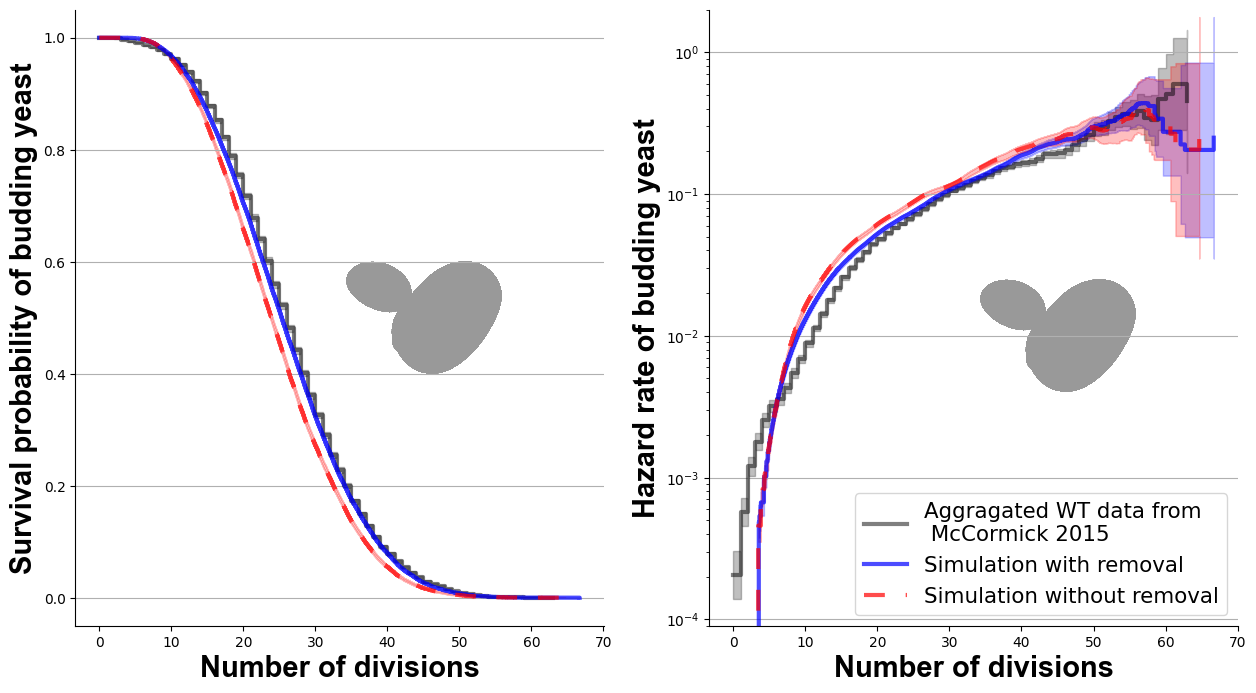

In [16]:
best_theta = presets.getTheta('Yeast')
print(best_theta)
# best_theta = [0.310,  0.120,   223.65,  185.27]
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
no_beta_theta = best_theta.copy()
no_beta_theta[1] = 0
sf=0.7
title_font = {'fontname':'Arial', 'size':f'{28*sf}', 'color':'black', 'weight':'normal'}
axis_font = {'fontname':'Arial', 'size':f'{30*sf}','weight':'bold'}  
legend_font = {'size':f'{22*sf}'}

best_sim = srh.getSrHetro(best_theta, nsteps=nsteps, npeople=npeople, time_step_multiplier=time_step_multiplier, t_end=t_end,hetro = False)
no_beta_sim = srh.getSrHetro(no_beta_theta, nsteps=nsteps, npeople=npeople, time_step_multiplier=time_step_multiplier, t_end=t_end,hetro = False)

from matplotlib import image as mpimg
img = mpimg.imread('silhouetts/yeast.jpg')
rr.add_image_marker(axs[0],img,x=45,y=0.5,zoom=0.05,transparency=0.4)
rr.add_image_marker(axs[1],img,x=45,y=np.exp(np.log(1e-2)/2+np.log(1e-1)),zoom=0.05,transparency=0.4)



ax0=axs[0]
data_plot_params = {'color':'black', 'linestyle':'-', 'linewidth':3, 'alpha':0.5}
best_sim_plot_params = {'color':'blue', 'linestyle':'-', 'linewidth':3, 'alpha':0.7}
no_beta_sim_plot_params = {'color':'red', 'linestyle':(0, (5, 5)), 'linewidth':3, 'alpha':0.7}
# Plot survival on ax[0]
ds.plotSurvival(ax=ax0, label='Aggragated WT data from McCormick 2015', **data_plot_params)
best_sim.plotSurvival(ax=ax0, label='Simulation with best fit parametrs',**best_sim_plot_params)
no_beta_sim.plotSurvival(ax=ax0, label='Simulation with best fit parametrs where we set beta = 0', **no_beta_sim_plot_params)
ax0.set_xlabel('Number of divisions', **axis_font)
ax0.set_ylabel('Survival probability of budding yeast', **axis_font)
ax0.set_xlabel('Number of divisions')
#show grid on y axis:
ax0.yaxis.grid(True)
ax0.xaxis.grid(False)
#remove legend:
ax0.get_legend().remove()

# Plot hazard on ax[1]
ax1=axs[1]
ds.plotHazard(ax=ax1, label='Aggragated WT data from \n McCormick 2015', **data_plot_params)
best_sim.plotHazard(ax=ax1, label='Simulation with removal', **best_sim_plot_params)
no_beta_sim.plotHazard(ax=ax1, label='Simulation without removal', **no_beta_sim_plot_params)
ax1.set_xlabel('Number of divisions', **axis_font)
ax1.set_ylabel('Hazard rate of budding yeast', **axis_font)
ax1.set_yscale('log')
ax1.yaxis.grid(True)
ax1.xaxis.grid(False)
ax1.set_ylim(9e-5,2)
#legend on bottom right:
ax1.legend(loc='lower right', prop=legend_font)
# fig.suptitle('SR model params vs Data for Budding Yeast')



if save_fig:
    fig.savefig(f'SR_model_params_vs_Data_for_Budding_Yeast.{file_type}', format=f'{file_type}',transparent=True)

In [6]:
best_theta = presets.getTheta('Yeast')

best_sim = srh.getSrHetro(best_theta, nsteps=nsteps, npeople=npeople, time_step_multiplier=time_step_multiplier, t_end=t_end,hetro = False)
best_theta = [0.310,  0.120,   223.65,  185.27]
best_sim2 = srh.getSrHetro(best_theta, nsteps=nsteps, npeople=npeople, time_step_multiplier=time_step_multiplier, t_end=t_end,hetro = False)


Using alias 'Yeast' -> 'yeast'
Converting time units: days -> generations (s=0.125)


In [7]:
print(sr.distance(ds,best_sim,dt=1,metric='baysian'))
print(sr.distance(ds,best_sim2,dt=1,metric='baysian'))






-90215.69277977583
-90625.99714183336


Using alias 'Yeast' -> 'yeast'
Converting time units: days -> generations (s=0.125)
[1.16346221e+01 2.31761673e+01 2.99155113e+05 6.10138200e+03]


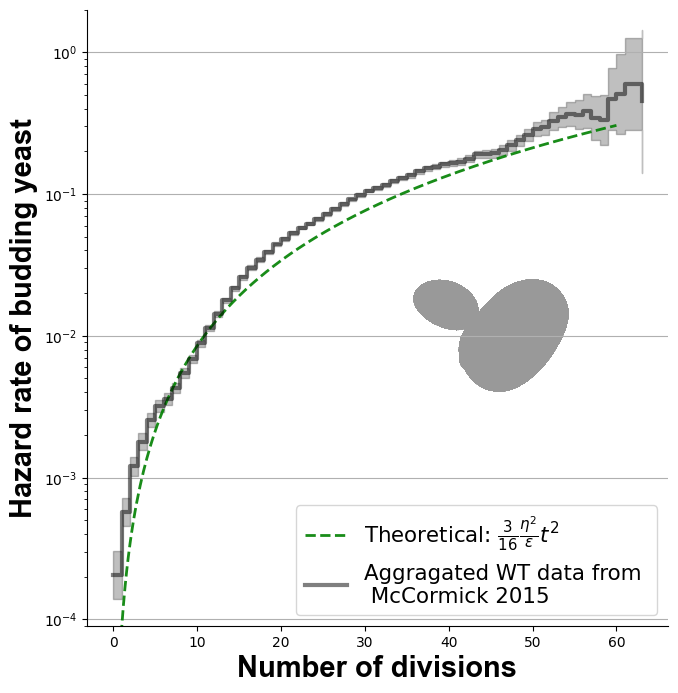

In [29]:
best_theta = presets.getTheta('Yeast')
print(best_theta)

fig, ax = plt.subplots(1, 1, figsize=(7.5, 8))  # Only one axis for hazard
sf = 0.7
axis_font = {'fontname': 'Arial', 'size': f'{30*sf}', 'weight': 'bold'}
legend_font = {'size': f'{22*sf}'}

from matplotlib import image as mpimg
img = mpimg.imread('silhouetts/yeast.jpg')
rr.add_image_marker(ax, img, x=45, y=np.exp(np.log(1e-2)/2 + np.log(1e-1)), zoom=0.05, transparency=0.4)

data_plot_params = {'color': 'black', 'linestyle': '-', 'linewidth': 3, 'alpha': 0.5}

# Theory hazard: h(t) = 3/16 * (alpha^2 / R) * t^2
t_theory = np.linspace(0, 60, 300)
haz_theory = 3/16 * (best_theta[0]**2 / best_theta[2]) * t_theory**2

# Plot hazard (data and theory)
ax.plot(t_theory, haz_theory, color='green', linestyle='--', linewidth=2, alpha=0.9,
         label='Theoretical: $\\frac{3}{16} \\frac{\\eta^2}{\\epsilon} t^2$')
ds.plotHazard(ax=ax, label='Aggragated WT data from \n McCormick 2015', **data_plot_params)

ax.set_xlabel('Number of divisions', **axis_font)
ax.set_ylabel('Hazard rate of budding yeast', **axis_font)
ax.set_yscale('log')
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_ylim(9e-5, 2)
ax.legend(loc='lower right', prop=legend_font)
